In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

In [3]:
results_dir = Path('result')
results = {}
for d in results_dir.iterdir():
    pheno = d.name
    result_pkl = d/'results.pkl'
    if not result_pkl.exists():
        continue
    with open(d/'results.pkl','rb') as f:
        results[pheno] = pickle.load(f)
phenotypes = sorted(results.keys())

In [4]:
list(results['WBC'].keys())

['history', 'y_valid', 'y_scores', 'vals_pred', 'vals_true', 'scaler']

In [5]:
list(results['WBC']['history'].keys())

['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']

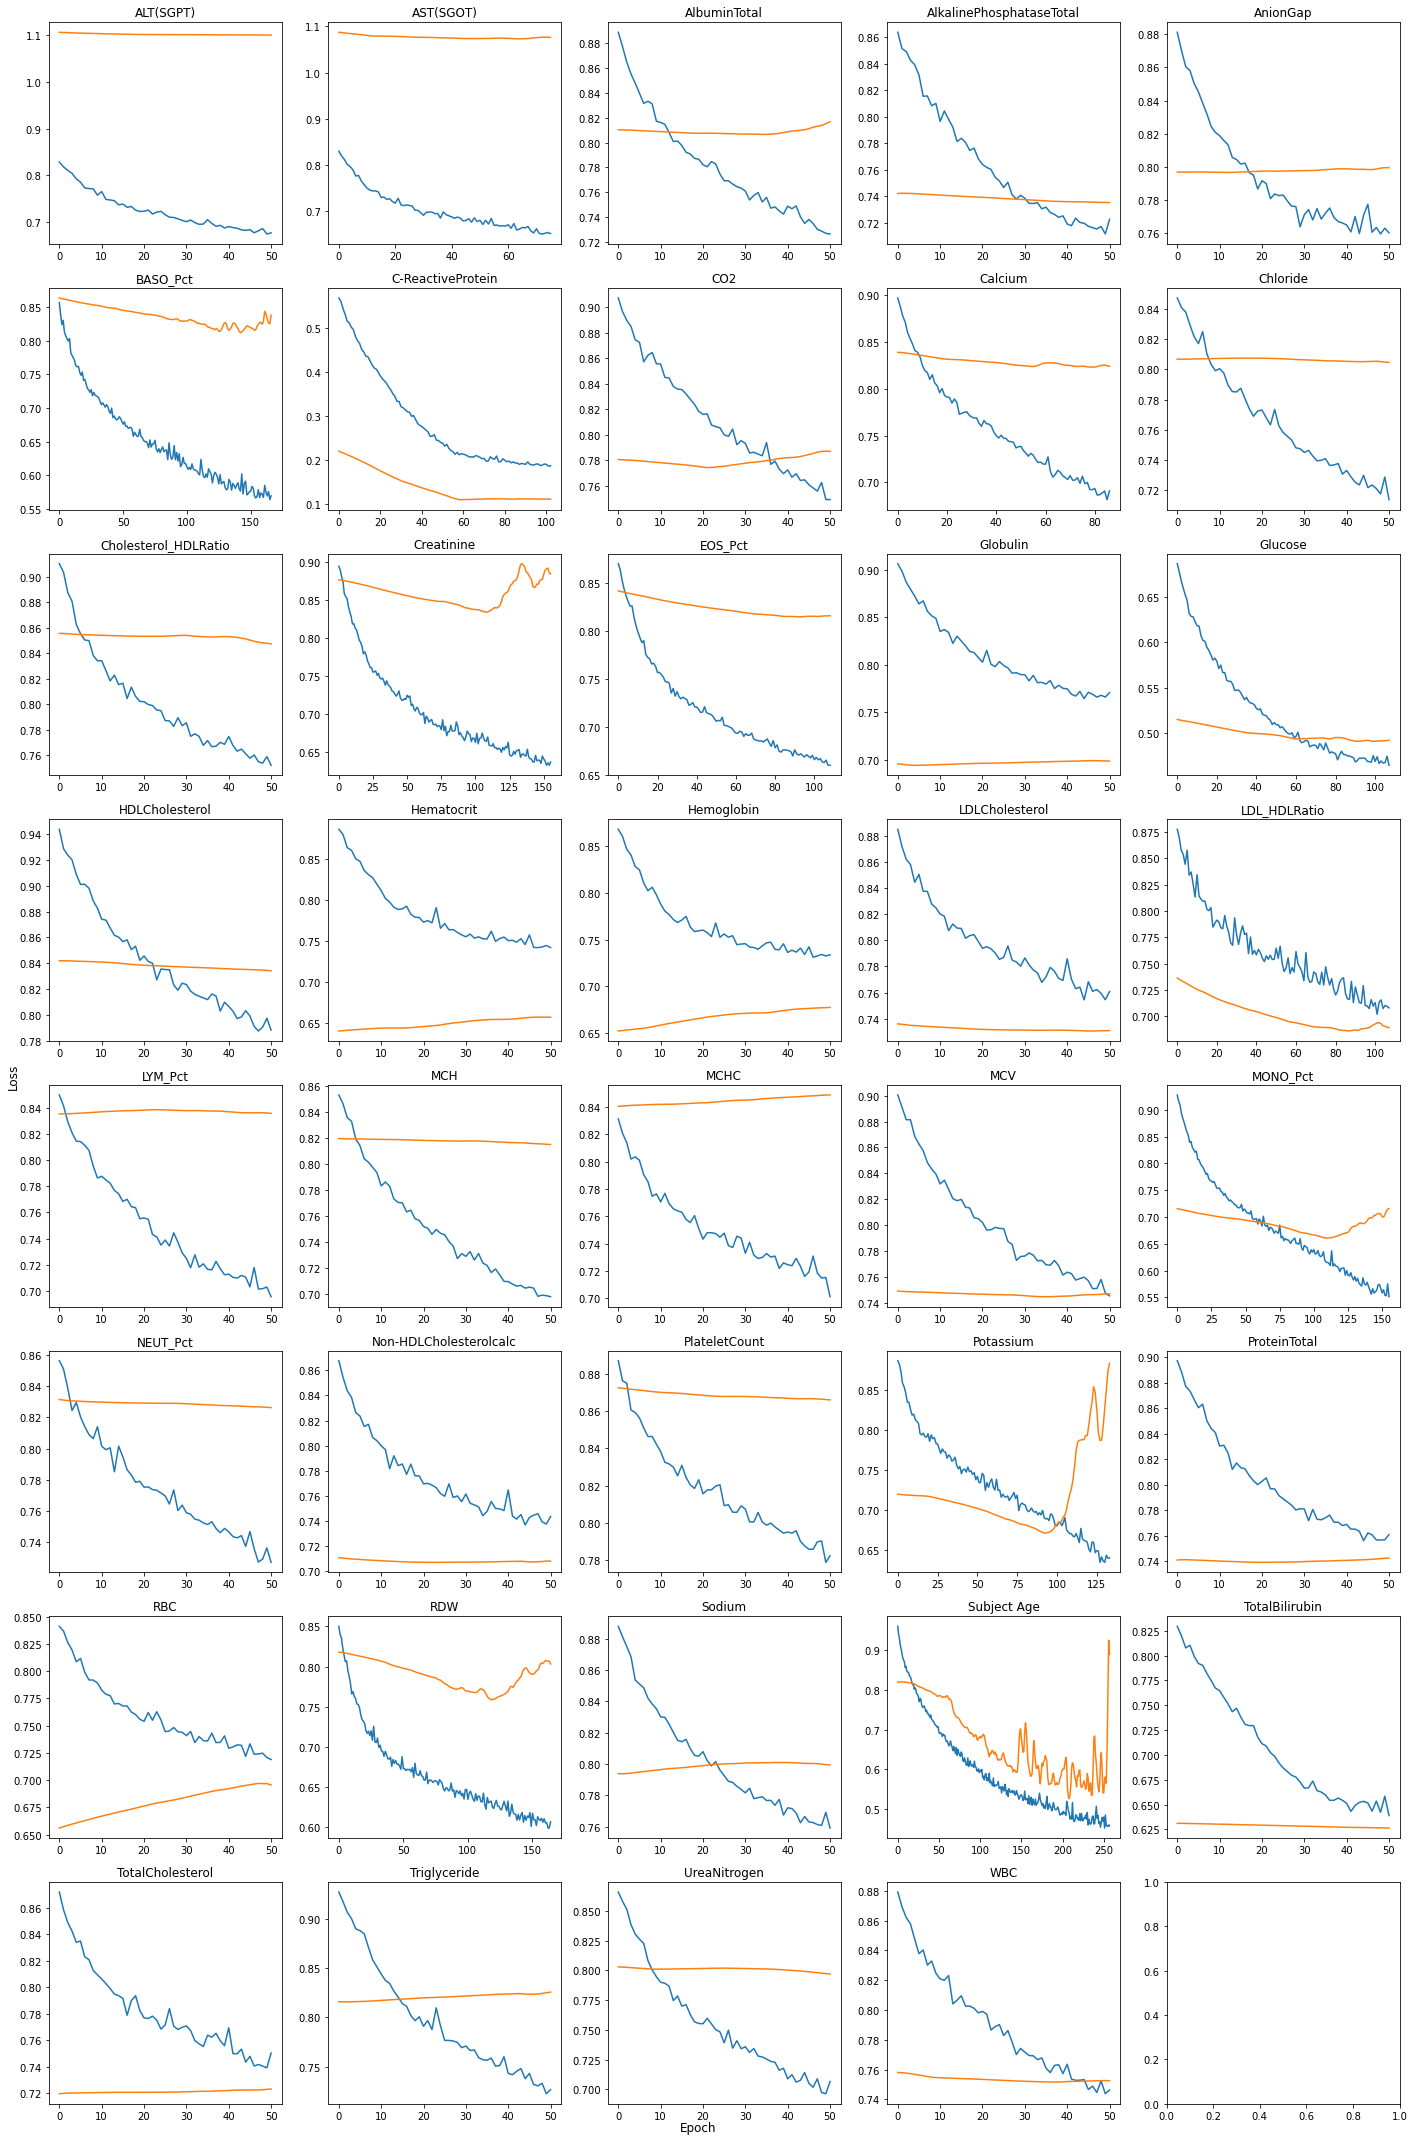

In [6]:
fig, axes = plt.subplots(8,5, figsize=(20,30))
flaxes = [axis for _ in axes for axis in _]
for i, pheno in enumerate(phenotypes):
    ax = flaxes[i]
    train_hist = results[pheno]['history']['mean_absolute_error']
    valid_hist = results[pheno]['history']['val_mean_absolute_error']
    ax.plot(train_hist)
    ax.plot(valid_hist)
    ax.set_title(pheno)
fig.supylabel('Loss')
fig.supxlabel('Epoch')
plt.tight_layout()
plt.show()

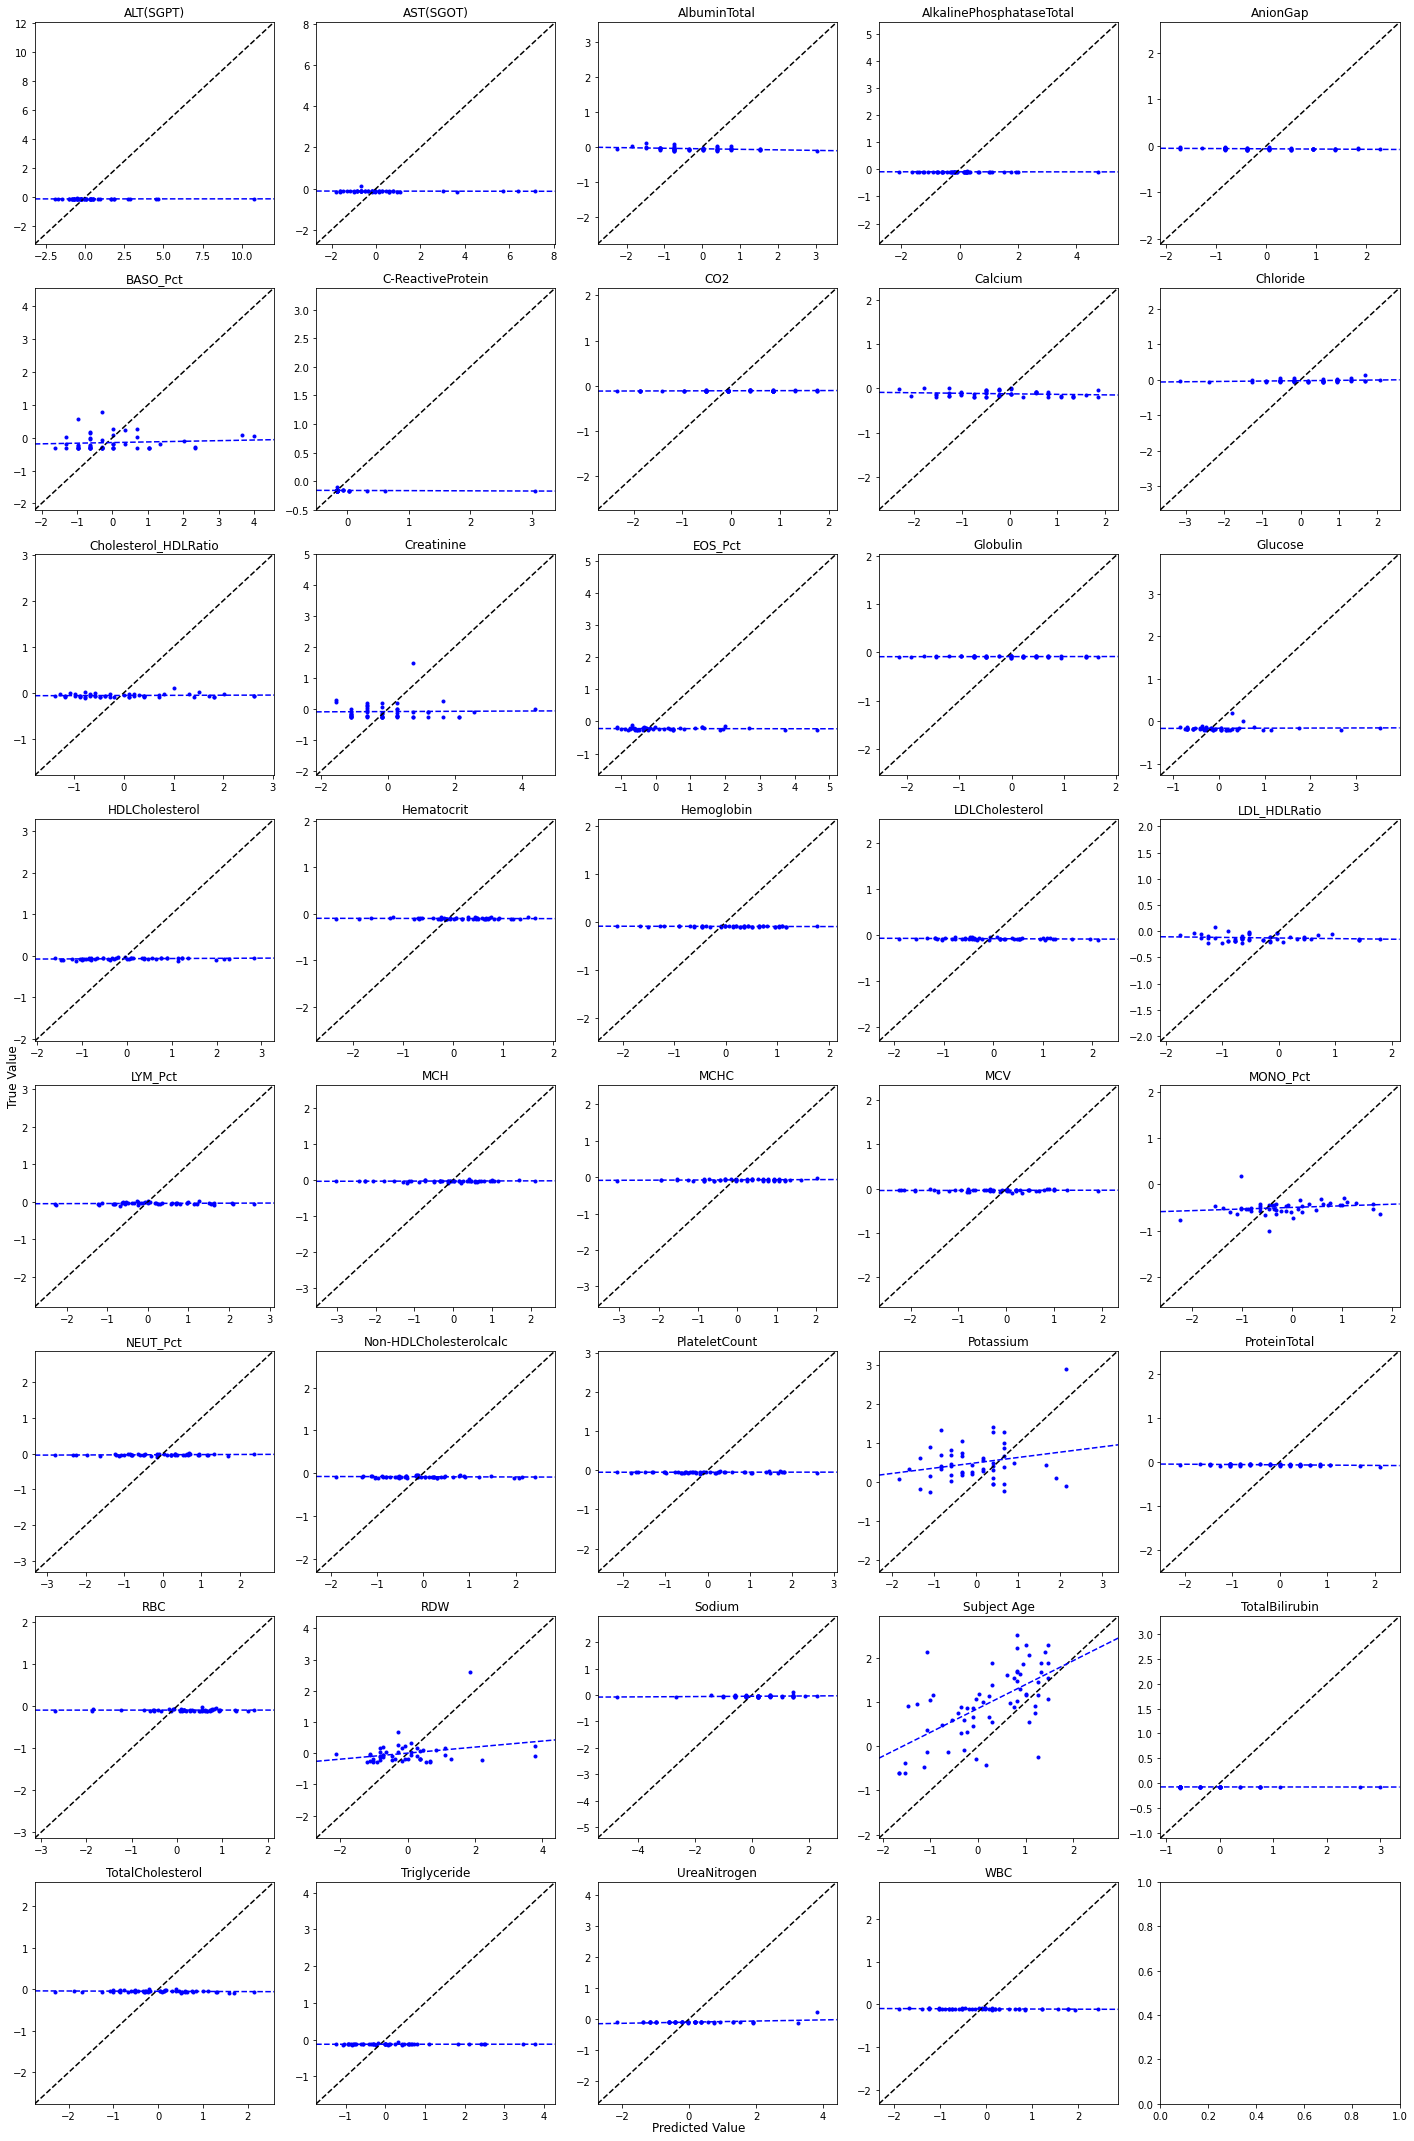

In [7]:
fig, axes = plt.subplots(8,5, figsize=(20,30))
flaxes = [axis for _ in axes for axis in _]
for i, pheno in enumerate(phenotypes):
    ax = flaxes[i]
    vals_true = results[pheno]['y_valid']
    vals_pred = results[pheno]['y_scores']
    ax.plot(vals_true, vals_pred, 'b.')
    limits = (min(min(vals_true), min(vals_pred)), max(max(vals_true), max(vals_pred)))
    limits = (limits[0] - 0.1*(limits[1] - limits[0]), limits[1] + 0.1*(limits[1] - limits[0]))
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.set_title(pheno)
    ax.plot(limits,limits,'--k')
    coef = np.polyfit(vals_true, vals_pred, 1)
    poly1d_fn = np.poly1d(coef)
    ax.plot(limits, poly1d_fn(limits), '--b')
fig.supylabel('True Value')
fig.supxlabel('Predicted Value')
plt.tight_layout()
plt.show()